# Прогнозируем временные ряды продаж товаров
В этом задании предлагается проанализировать датасет продаж различных товаров и построить предсказание на 24 дня вперед с `2018-12-07`.

В ноутбуке содержится ряд вопросов, которые подскажут, на что стоит обратить внимание при прогнозировании. Ответы на них следует оформлять текстом и иллюстрировать кодом/визуализациями.


Подробное описание датасетов содержится в файле `dataset/README.md`.

Ноутбук дорабатывется

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os
zip_file = '/content/drive/MyDrive/ОбучениеML/Практика/Датасеты/etna.zip'
z = zipfile.ZipFile(zip_file, 'r')
z.extractall()

In [ ]:
import pandas as pd
# загружаю со своего диска
# загружаем датасет с продажами продуктов
df_products = pd.read_csv("/content/experiments-ETNA-1076-experiments-ETNA-1076-task/experiments/ETNA-1076/task/dataset/products.csv", index_col=0)

# загружаем датасет с рекламными акциями
df_promotions = pd.read_csv("/content/experiments-ETNA-1076-experiments-ETNA-1076-task/experiments/ETNA-1076/task/dataset/promotions.csv", index_col=0)

***
# 0. Загрузка датасета
В этой части не нужно писать никакого дополнительного кода.

In [ ]:
!ls dataset

In [ ]:
import pandas as pd

# загружаем датасет с продажами продуктов
df_products = pd.read_csv("dataset/products.csv", index_col=0)

# загружаем датасет с рекламными акциями
df_promotions = pd.read_csv("dataset/promotions.csv", index_col=0)

FileNotFoundError: ignored

In [ ]:
df_products.head()

,product_10,product_11,product_12,product_13,product_14,product_15,product_16,product_17,product_18,product_19,...,product_30,product_31,product_32,product_33,product_34,product_35,product_36,product_37,product_38,product_39
2016-01-01,2616.3,3548.8,3898.3,2173.9,845.82,1600.8,3019.2,488.03,2924.9,575.77,...,2394.3,1284.2,1996.5,3888.6,951.88,434.17,2313.1,1946.3,2045.0,2440.3
2016-01-02,2507.9,3666.3,3987.2,2309.4,835.09,1589.1,2982.1,993.10,2567.3,597.55,...,2335.8,1265.1,2079.5,3793.9,1112.00,429.92,2242.9,2064.1,2076.4,2304.4
2016-01-03,2548.7,3593.0,3955.7,2365.1,828.74,1527.7,3356.4,508.29,3080.3,595.60,...,2389.3,1256.0,2054.2,3937.5,1100.40,451.81,2500.4,1884.0,1906.3,2244.8
2016-01-04,2492.4,3432.9,4024.1,2286.7,802.93,1614.8,2352.6,473.96,3042.9,597.33,...,2418.8,1215.5,2095.5,4274.6,1081.20,448.80,2543.8,1834.8,1935.1,2255.8
2016-01-05,2707.5,3661.1,4041.6,2293.0,819.55,1584.4,2529.2,630.37,3094.1,571.56,...,2464.4,1197.6,2292.7,3897.3,1039.00,441.35,2261.1,2039.7,1762.8,2367.5


In [ ]:
print(f"Датасет с продажами: {df_products.shape}")
print(f"Датасет с акциями: {df_promotions.shape}")

Датасет с продажами: (1071, 30)
Датасет с акциями: (1095, 1000)


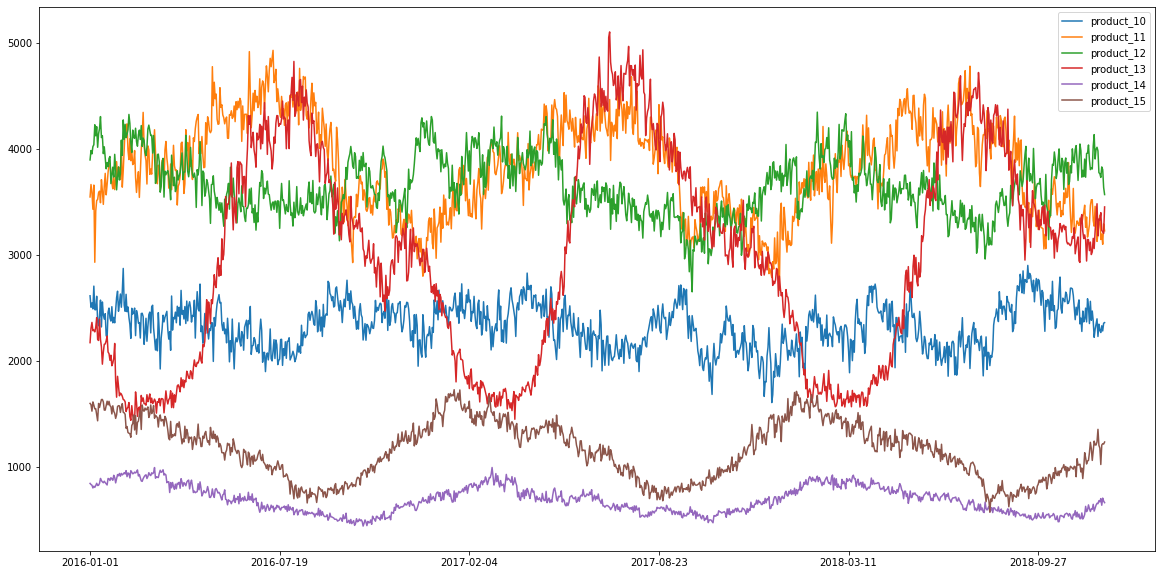

In [ ]:
# посмотрим, как выглядят ряды, которые нужно будет спрогнозировать
_ = df_products.iloc[:, pd.IndexSlice[0:6]].plot(figsize=(20, 10))

Сразу видно, что ряды имеют разный масштаб, различную переодичность. В последующих пунктах это будет установленно точнее.

***
# 1. EDA
В этом блоке предлагается изучить исходные данные и ответить на вопросы про них.

## 1.1. Сезонности и тренды
<ol>
    <li>Есть ли в данных явно выраженные тренды?</li>
    <li>Есть ли в данных сезонность? Если есть, то какая? Почему это может быть важно?</li>
</ol>

# Анализ на наличие трендов
Используем экспонинциальное сглаживание, чтобы убрать сильные колебания с графиков.

Коэффициент сглаживания выбираем близкий к нулю, чтобы лучше видеть тренд.

In [ ]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

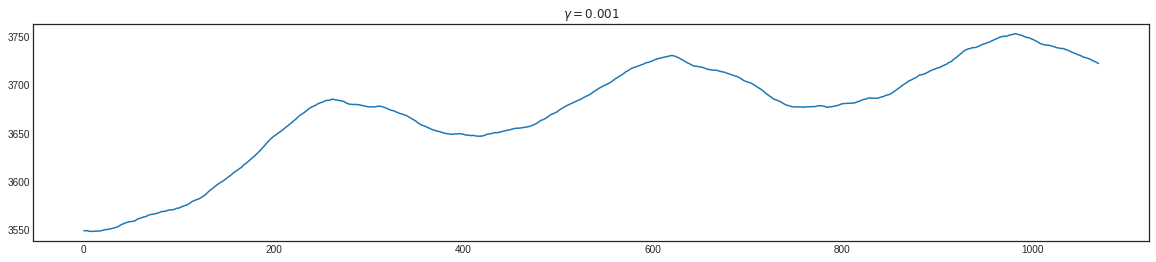

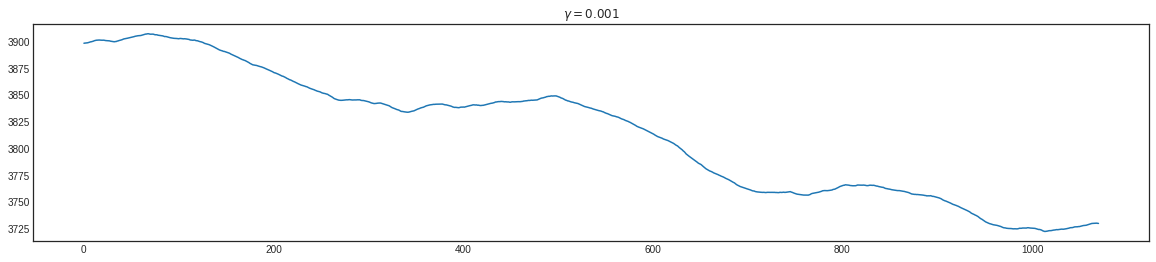

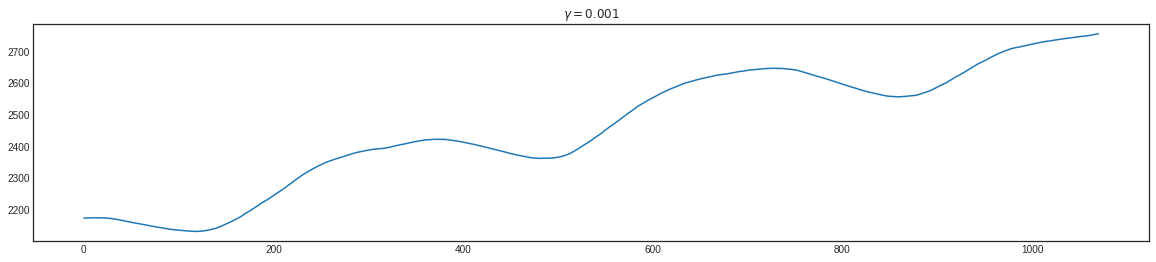

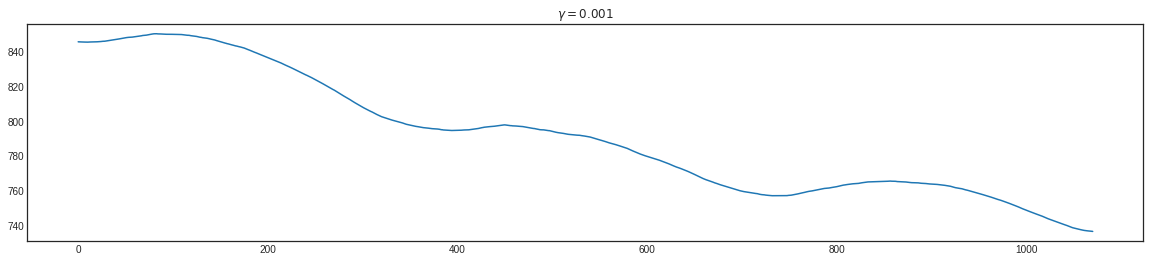

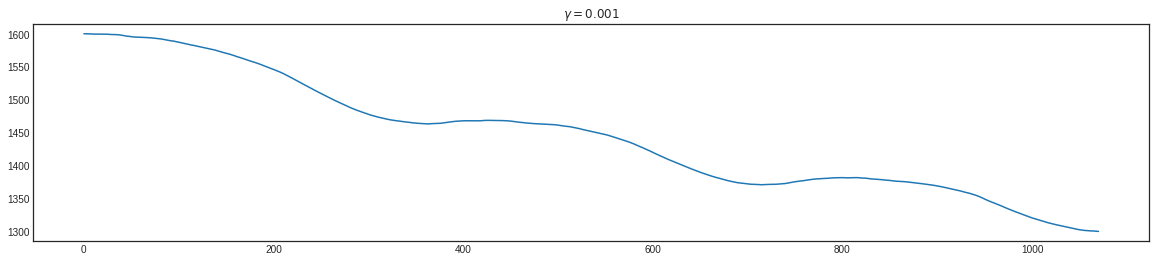

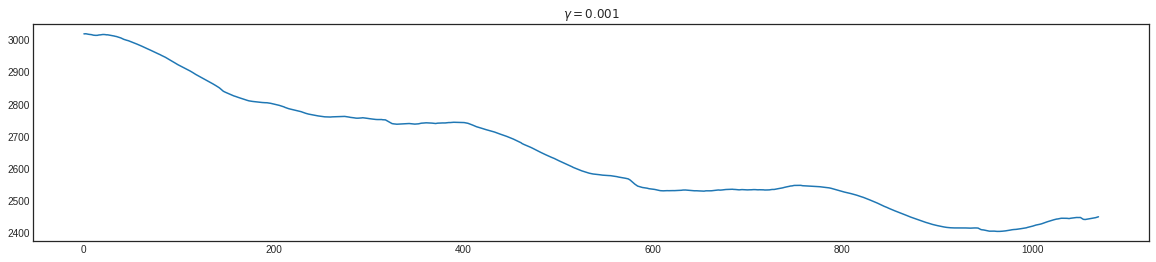

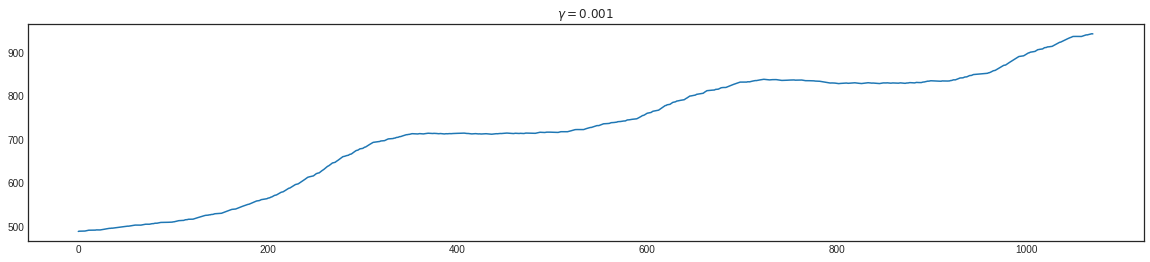

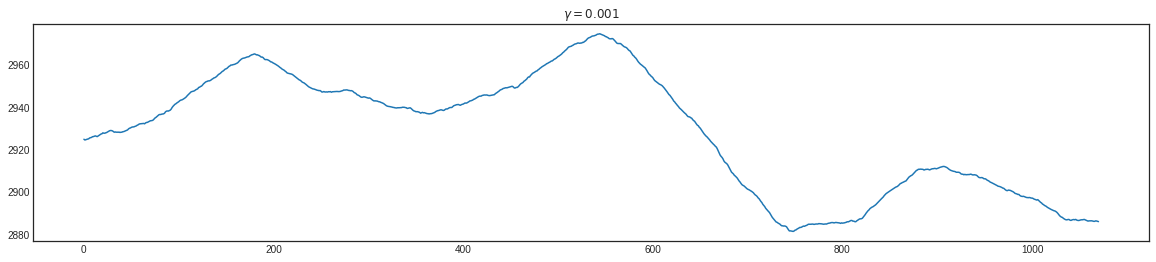

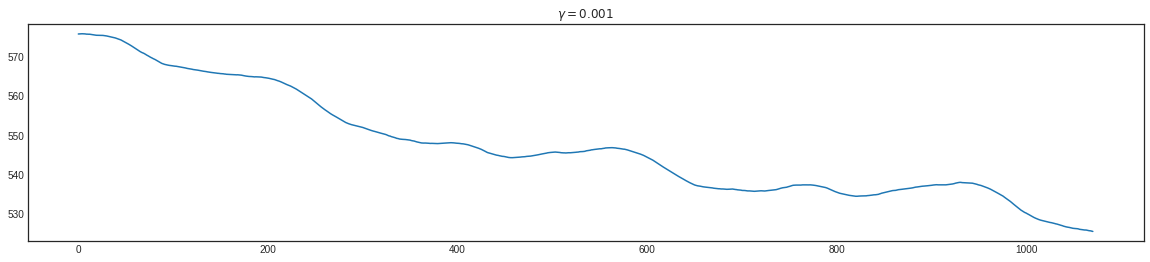

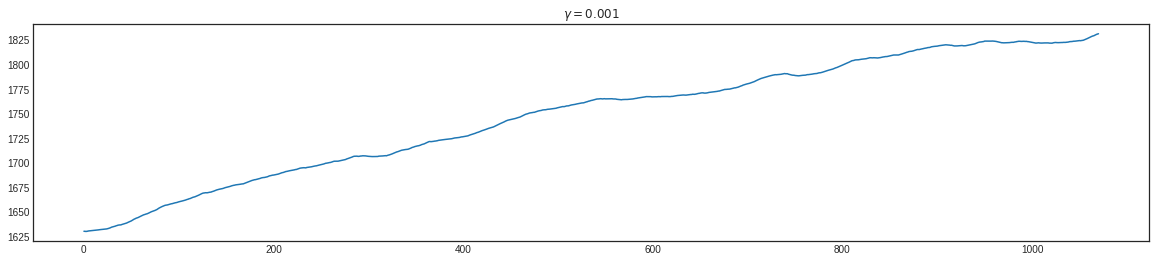

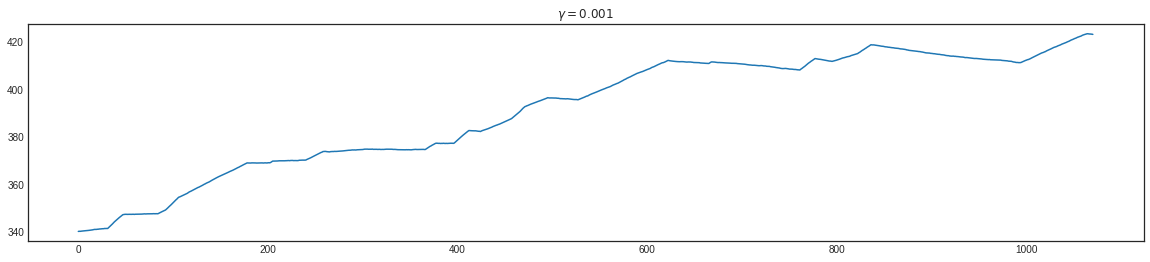

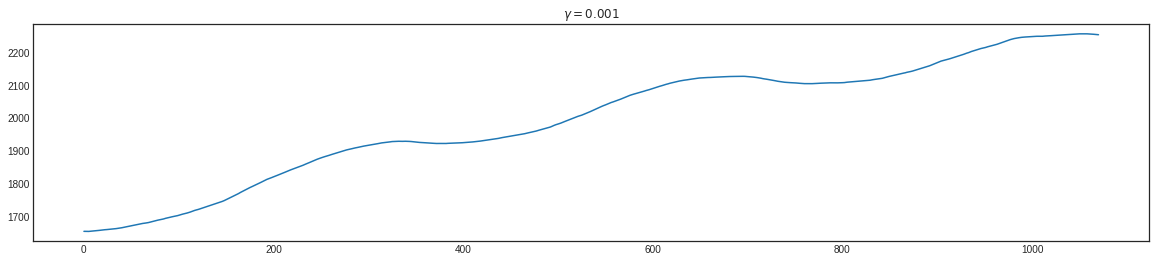

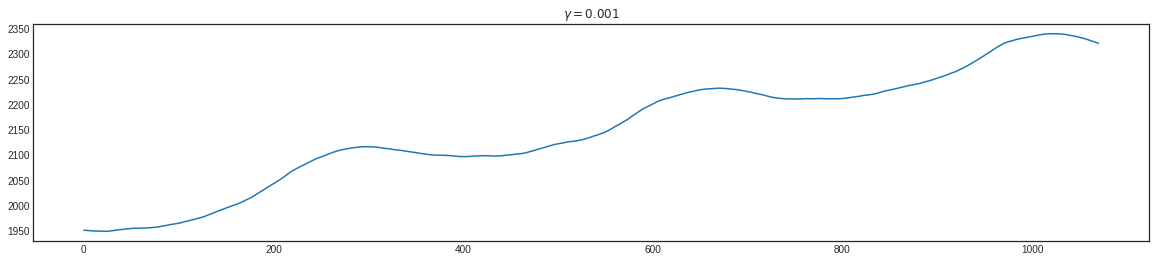

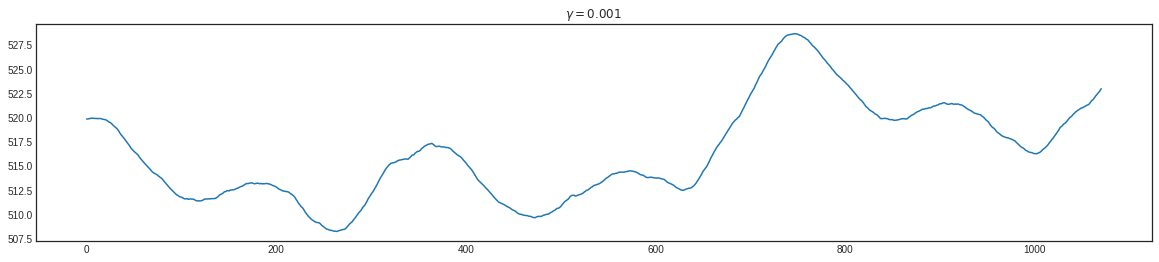

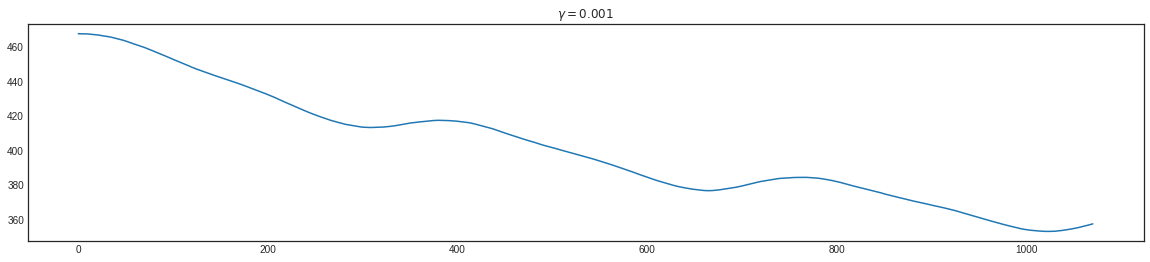

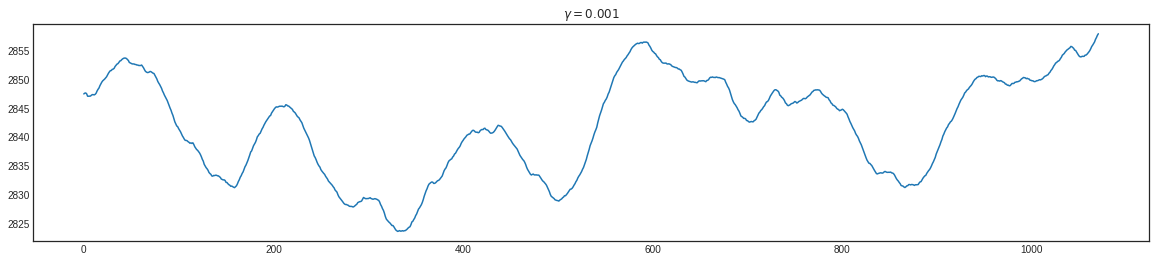

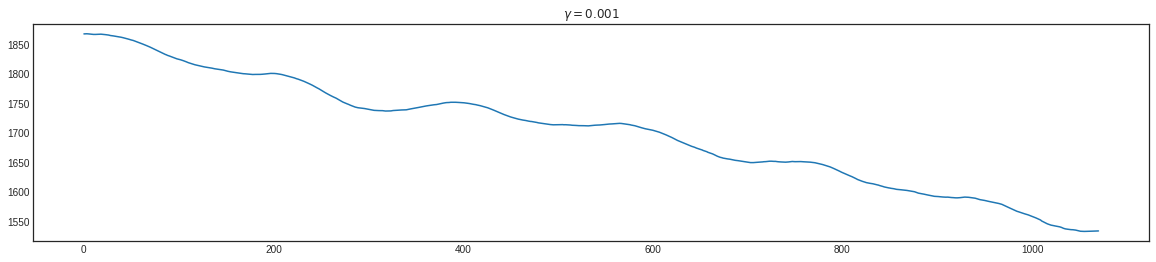

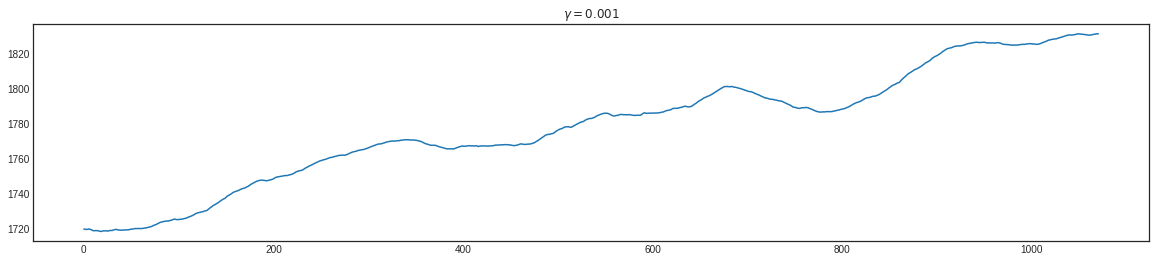

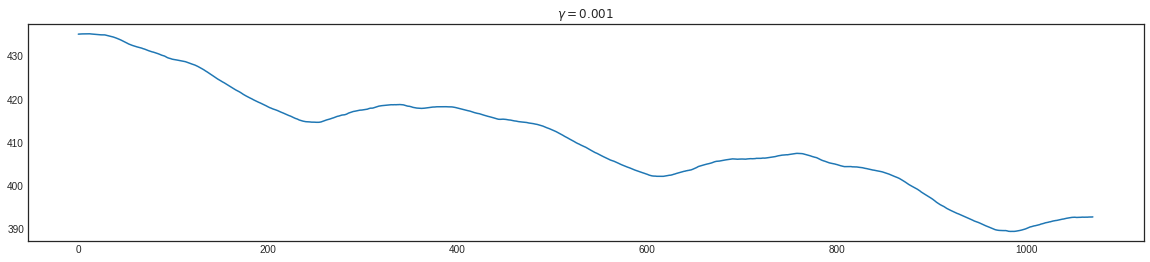

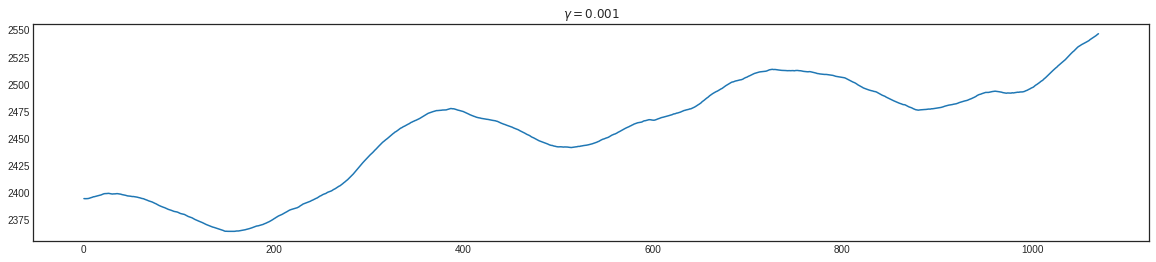

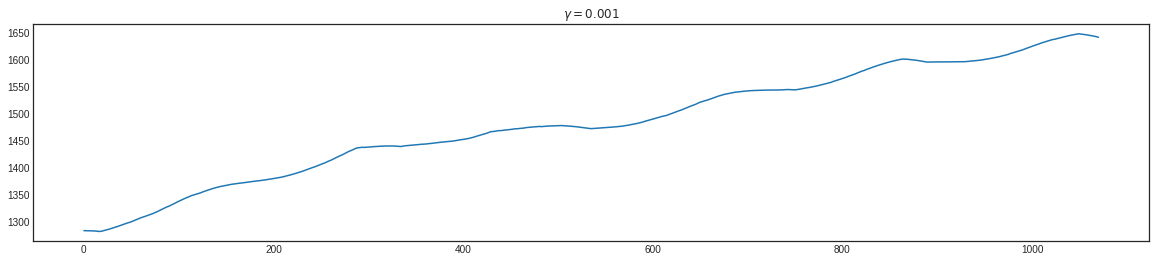

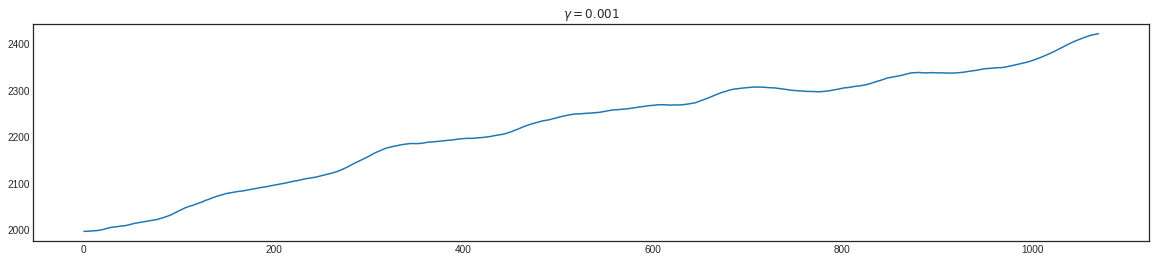

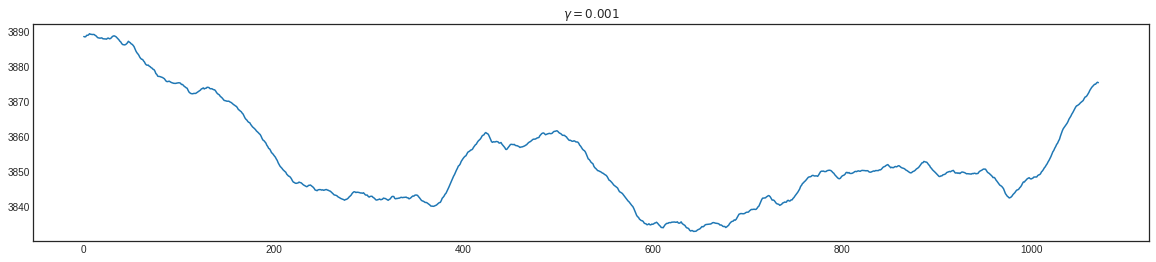

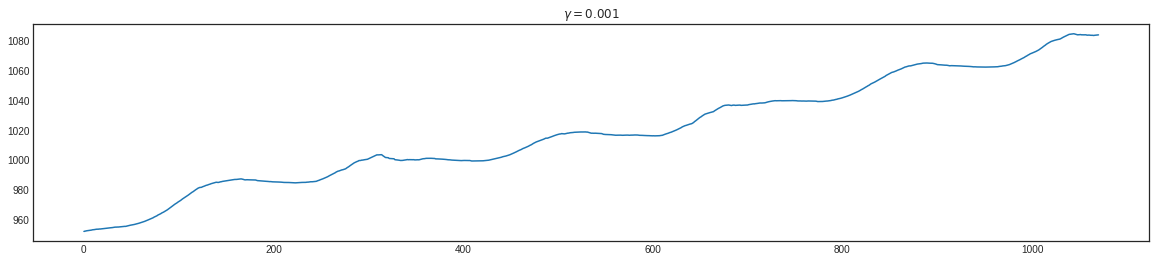

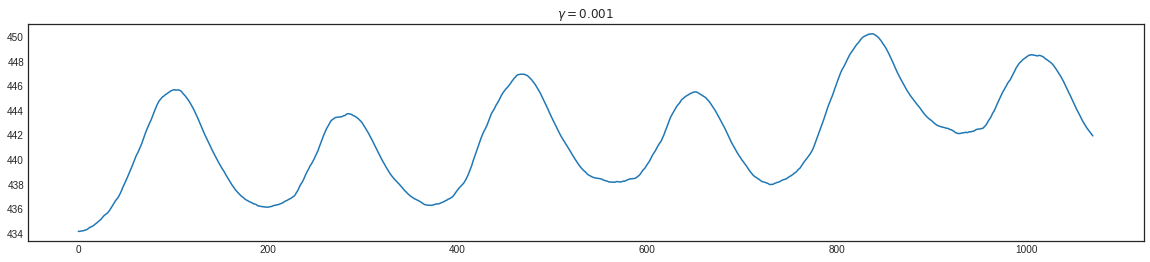

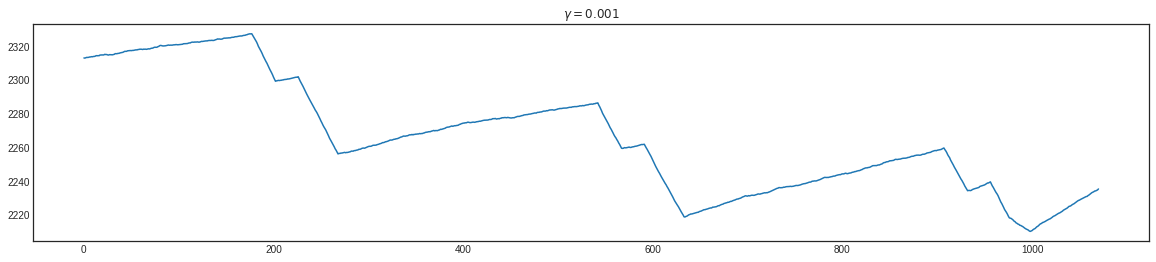

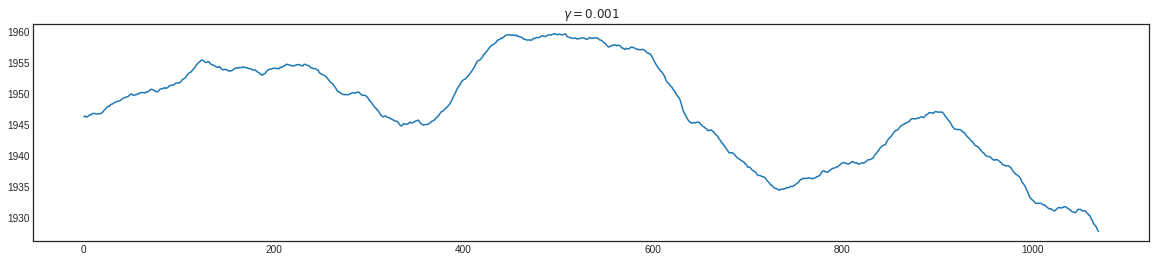

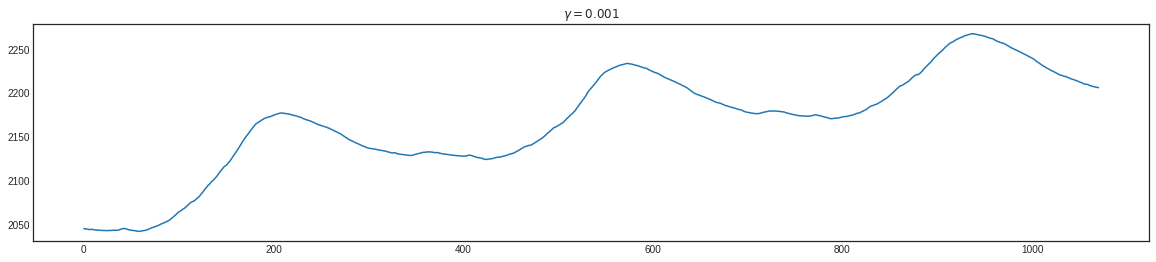

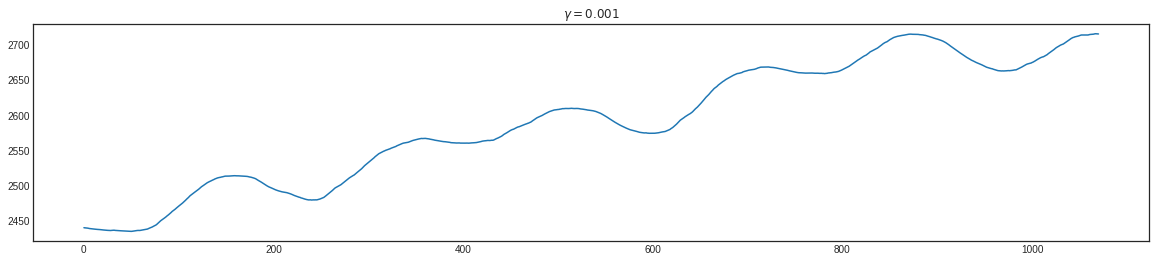

In [ ]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn-white'):    
    alpha = 0.001
    for i in range(1,30):
        fig = plt.figure(figsize=(20,4))
        plt.plot(exponential_smoothing(df_products.iloc[:, i], alpha), label="Alpha {}".format(alpha))
        #plt.plot(series_hat, '-o')
        plt.title('$\gamma={}$'.format(alpha))
        plt.show()

Анализ трендов на графиках дал следующие результаты:

восходящий тренд у рядов [1,3,7,10,11,12,13,18,20,21,22,25,29,30]

нисходящий тренд у рядов [2,4,5,6,9,15,17,19]

**требует дополнительных исследований [8,14,16,24,26,27,28]** 

В дальнейшем эта информация может понадобится нам для анализа. 

# Анализ на сезонность

С помощью того же алгоритма, что и в прошлом пункте, посторим графики, но значения альфа возьмём больше.

In [ ]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn-white'):    
    alpha = 0.200
    for i in range(1,30):
        fig = plt.figure(figsize=(20,4))
        plt.plot(exponential_smoothing(df_products.iloc[:, i], alpha), label="Alpha {}".format(alpha))
        #plt.plot(series_hat, '-o')
        plt.title('$\gamma={}$'.format(alpha))
        plt.show()

Можем заметить, что в некоторых случаях проявляется сезонность, а в некоторых это уже не так очевидно.

Важно изучить ряды на сезонность, потому что модель должна учитывать переодические колебания продаж(продажи в общем случае имеют выраженную сезонность). Это поможет нам при решении задачи предсказания.

KeyboardInterrupt: ignored

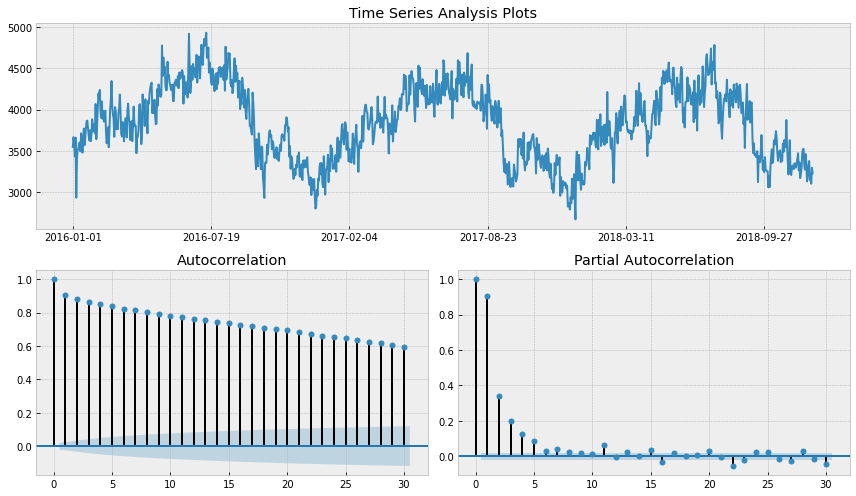

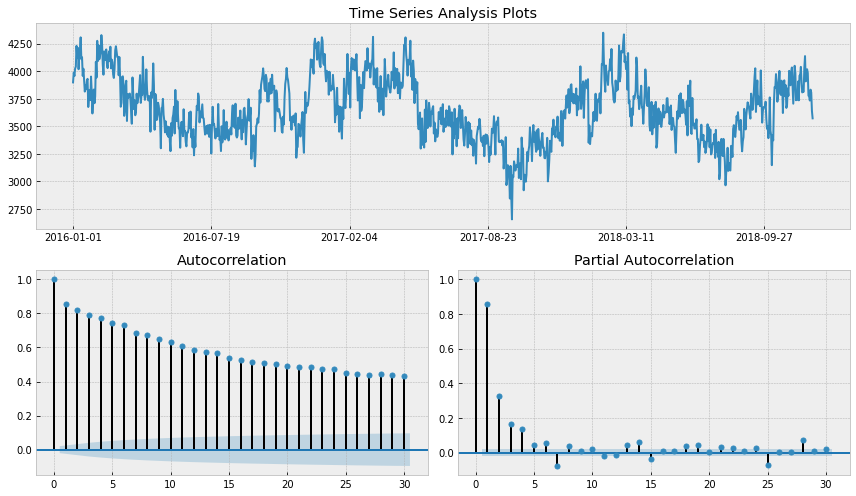

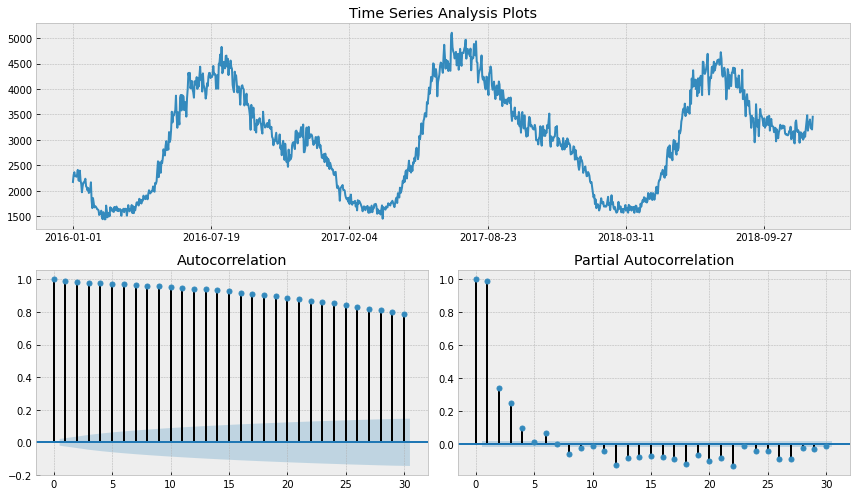

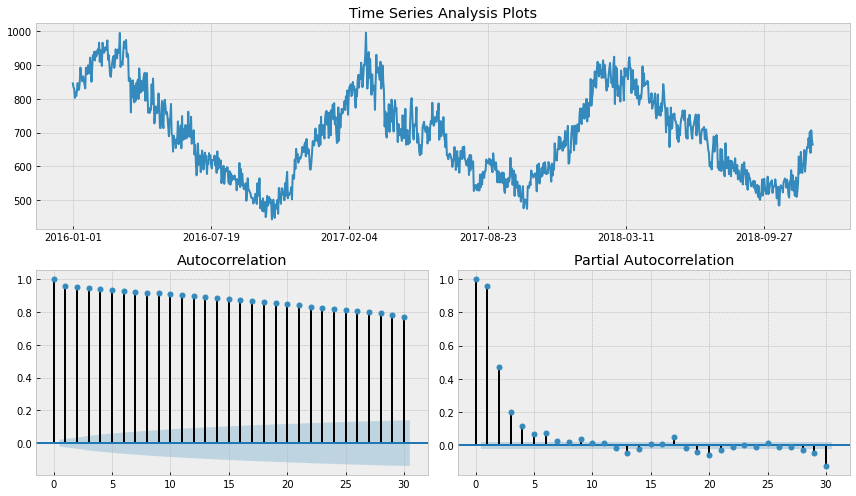

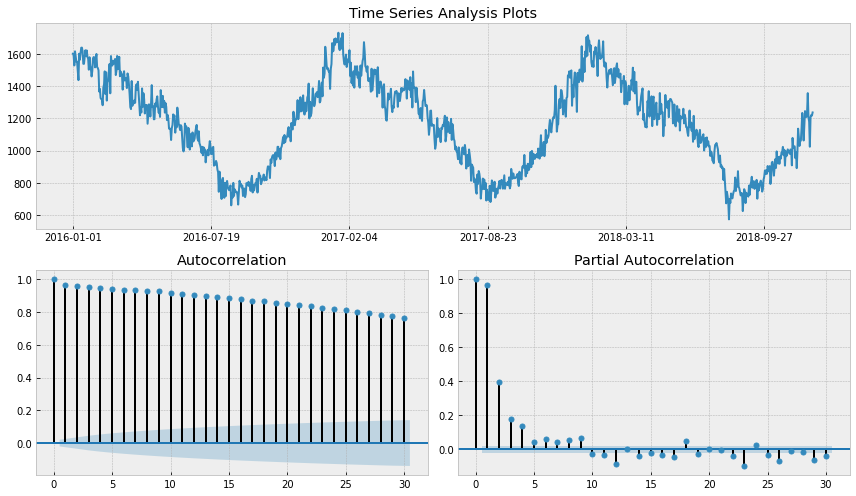

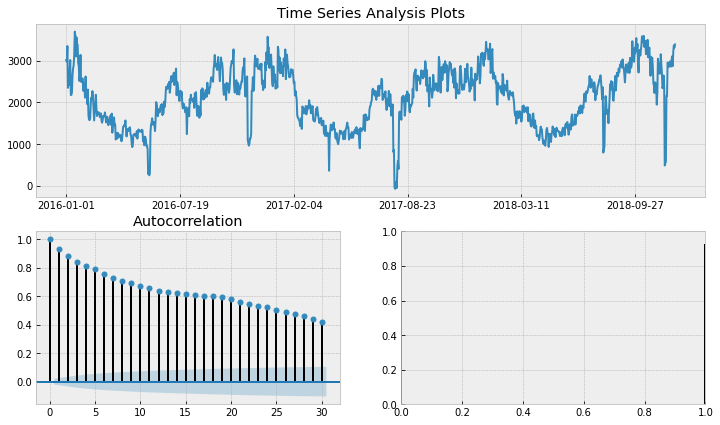

In [ ]:
import statsmodels.tsa.api as smt
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        plt.tight_layout()
    return 

for i in range(1,30):
  tsplot(df_products.iloc[:, i], lags=30)

Как видно по графикам выше - ряды имеют выраженную сезонность. 

## 1.2. Масштаб
<ol>
    <li> Какой масштаб у рядов? </li>
    <li> Какой разброс значений внутри каждого ряда? </li>
    <li> Может ли это как-то помешать при прогнозировании? </li>
</ol>

По графику из самого начала можно сделать вывод, что масштаб у рядов разный.
За разброс значений можно принять стандартное отклонение.

Разный масштаб данных может помешать пр предсказании, если использовать одну модель для всех рядов. Эта проблема и ёё влияние будет изучено в дальнейшем.

По таблице ниже видно, что разброс значений разный. По ней также можно определить значения оценки разброса и параметра положения.

In [ ]:
df_products.describe()

,product_10,product_11,product_12,product_13,product_14,product_15,product_16,product_17,product_18,product_19,...,product_30,product_31,product_32,product_33,product_34,product_35,product_36,product_37,product_38,product_39
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,...,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,2332.357049,3835.760971,3657.486368,2999.893557,689.858599,1164.607843,2111.656544,1150.392017,2892.739122,500.205173,...,2597.736041,1818.012932,2620.374136,3841.041457,1142.146293,449.075266,2193.331849,1930.008777,2317.995518,2847.222782
std,213.741588,439.866231,282.724222,981.623221,127.295105,269.870478,675.815979,534.497610,326.312567,64.374827,...,405.987121,297.029429,327.135124,282.226471,177.104854,114.409132,472.584718,144.323999,621.954928,606.189559
min,1608.400000,2669.800000,2653.500000,1438.000000,442.920000,574.160000,-75.561000,339.060000,1800.700000,322.910000,...,1809.400000,748.330000,1897.600000,3123.400000,389.090000,238.970000,862.310000,1368.200000,1237.700000,1535.600000
25%,2182.000000,3474.900000,3455.950000,2003.050000,582.770000,945.185000,1567.650000,741.575000,2653.400000,457.605000,...,2254.600000,1609.500000,2394.800000,3631.350000,1010.400000,347.810000,2212.550000,1833.900000,1822.800000,2381.000000
50%,2344.600000,3842.600000,3641.300000,3064.000000,680.930000,1178.900000,2187.100000,1019.800000,2912.200000,509.340000,...,2614.800000,1809.300000,2576.700000,3833.700000,1104.800000,444.270000,2367.800000,1936.300000,2112.400000,2799.700000
75%,2490.150000,4186.150000,3867.150000,3833.200000,786.980000,1384.650000,2620.500000,1409.500000,3133.800000,550.210000,...,2888.650000,2058.850000,2817.600000,4028.050000,1272.300000,544.860000,2474.200000,2028.650000,2728.900000,3367.750000
max,2903.000000,4932.400000,4349.500000,5106.500000,995.910000,1730.100000,3702.400000,2547.500000,3710.400000,636.020000,...,3698.800000,2517.600000,3633.800000,4758.400000,1661.400000,709.820000,2849.900000,2359.300000,4074.000000,4382.700000


## 1.3. Аномалии
<ol>
    <li>Есть ли в рядах выбросы?</li>
    <li>Как выбросы могут повлиять на прогнозирование?</li>
    <li>Что с ними можно сделать?</li>
</ol>

In [ ]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [ ]:
def delete_extr(series, std, a = 3, alpha = 0.1, is_df = True):
  date_from = series.index[0]
  date_to =  series.index[-1]
  date_range = pd.date_range(date_from, date_to, freq="D")
  smoothed = exponential_smoothing(series, alpha)
  result = [series[0]]
  for n in range(1, len(series)-1):
      if (series[n] > smoothed[n] + a*std) or (series[n] < smoothed[n] - a*std):
          result.append((series[n-1] + series[n-1])/2)
      else: 
          result.append(series[n])
  result.append(series[len(series)-1])
  if is_df:
    date_from = series.index[0]
    date_to =  series.index[-1]
    result = pd.DataFrame(result)
    result.index = date_range
  return result

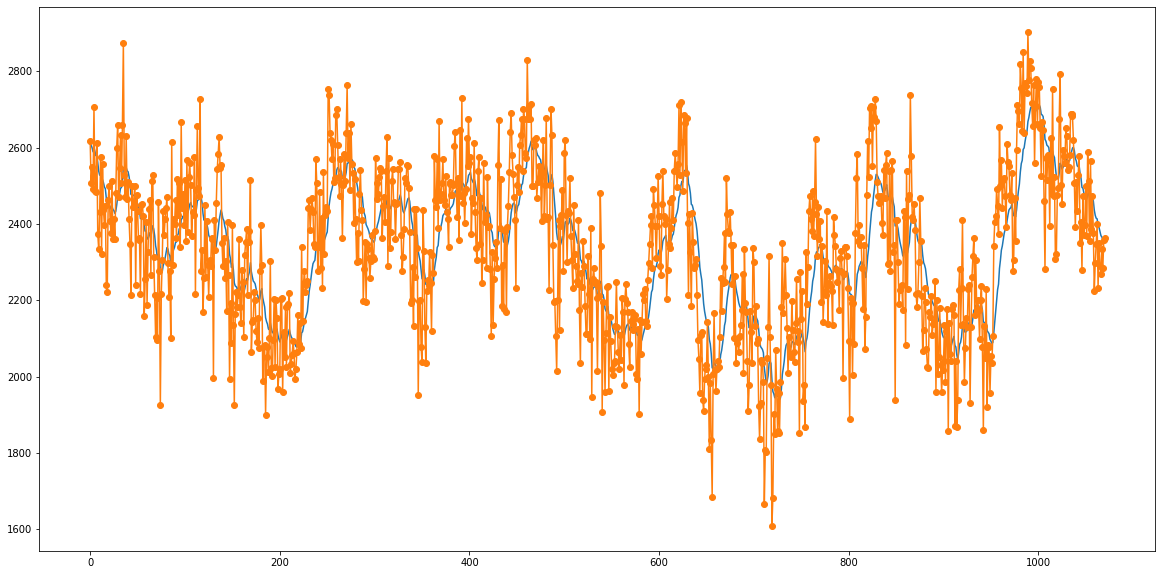

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.plot(exponential_smoothing(df_products.iloc[:, 0], 0.1), '-')
plt.plot(df_products.iloc[:, 0].to_numpy(), '-o')


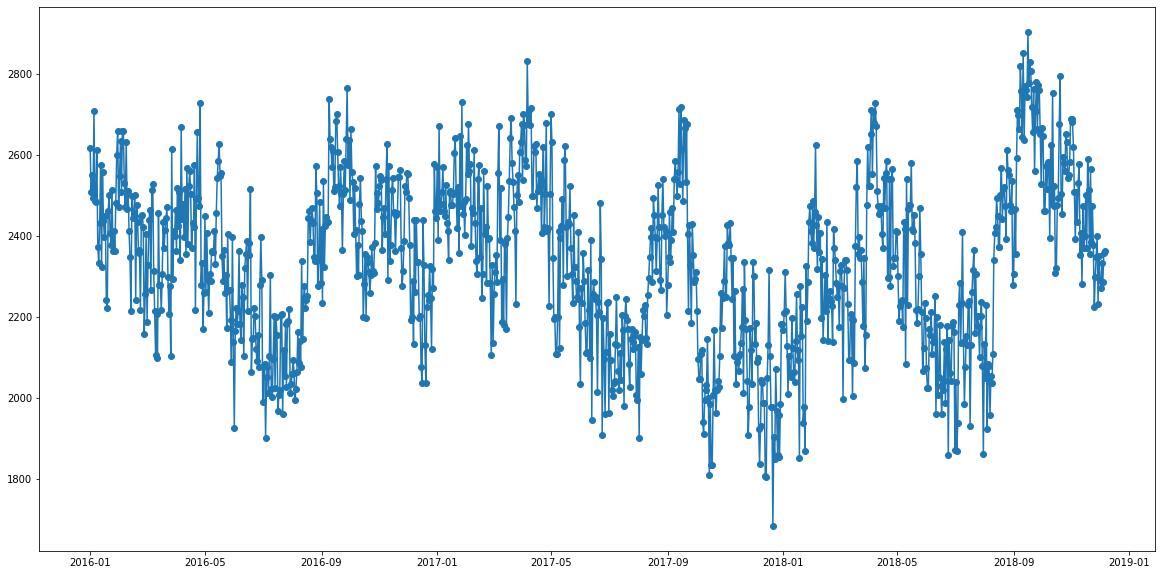

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.plot(delete_extr(df_products.iloc[:, 0], 213.741588, 1.5), '-o') 
#plt.plot(df_products.iloc[:, 0:1])

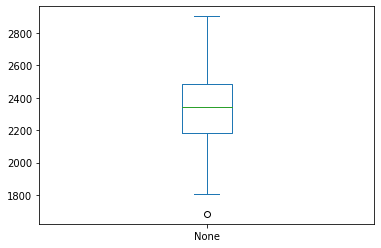

In [ ]:
y = pd.Series(delete_extr(df_products.iloc[:, 0], 213.741588, 1.5, is_df = False))
y.plot(kind='box')
plt.show()

In [ ]:
y.shape

(1071,)

## 1.4. Взаимосвязь рядов
<ol>
    <li>Коррелируют ли ряды между собой?</li>
    <li>Можно ли как-то это использовать? Если да, как? Если нет, почему?</li>
</ol>

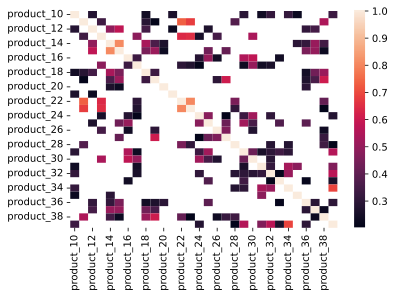

In [ ]:
 import seaborn as sns
 %config InlineBackend.figure_format = 'svg' 
 corr_matrix = df_products.corr()
sns.heatmap(corr_matrix[corr_matrix > 0.2])

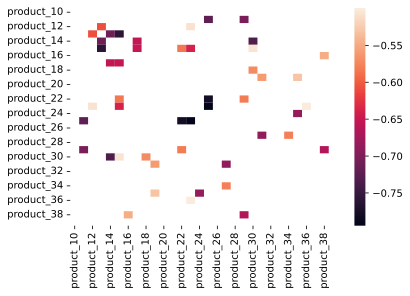

In [ ]:
sns.heatmap(corr_matrix[corr_matrix < -0.5])

## 1.5. Акции
<ol>
    <li>Что из себя представляет датасет с акциями?</li>
    <li>Как часто происходит каждая акция?</li>
    <li>Рекламная акция для какого-то продукта влияет на его продажи. Может ли она повлиять на продажи других продуктов?</li>
    <li>Есть ли акции, которые пересекаются по времени? Могут ли сразу несколько акций повлиять на один продукт?</li>
</ol>

In [ ]:
(df_promotions.iloc[0:, 0] > 0).value_counts()

True     939
False    156
Name: promotion_0, dtype: int64

In [ ]:
Y = df_products.iloc[:-24-n, 0].to_numpy()

In [ ]:
import numpy as np
n = 0
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
regr = ElasticNet(random_state=0)
X = df_promotions.iloc[:-48-n, :].to_numpy()
sk_reg = regr.fit(X[-100:], Y[-100:])

In [ ]:
X1 = df_promotions.iloc[-24-n:, :].to_numpy()
series = df_products.iloc[0:, :1].to_numpy()
points = np.arange(len(series))

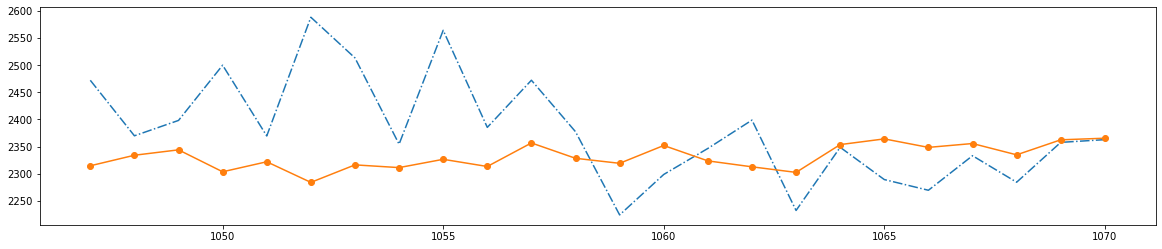

In [ ]:
from sklearn.linear_model import LinearRegression
fig = plt.figure(figsize=(20,4))
plt.plot(points[-24-n:], series[-24-n:], '-.')
plt.plot(points[-24-n:], www_ - ((X1@sk_reg.coef_).mean() - Y.mean()), '-o')
#plt.plot( points[:len(series)-24-n], X@sk_reg.coef_ - ((X@sk_reg.coef_).mean() - Y.mean()), '-o')
#plt.plot(points[-24:], X@sk_reg.coef_, '-o')
plt.show()


In [ ]:
df_promotions

,promotion_0,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,promotion_7,promotion_8,promotion_9,...,promotion_990,promotion_991,promotion_992,promotion_993,promotion_994,promotion_995,promotion_996,promotion_997,promotion_998,promotion_999
2016-01-01,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2016-01-02,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2016-01-03,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2016-01-04,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2016-01-05,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-26,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2018-12-27,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2018-12-28,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2018-12-29,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


## 1.6. Ваш ход
Может быть, есть еще что-то интересное, чего мы не заметили? :)

***
# 2. Прогнозирование
В этом блоке предлагается построить прогноз на указанный промежуток времени и ответить на вопросы о метриках и валидации результатов.

<i>Возможно, в этом блоке не получится разбить код на предложенные части; в таком случае следует оставить максимально подробный комментарий к происходящему. </i>

In [ ]:
HORIZON = 24 # горизонт прогнозирования

## 2.1. Пайплайн прогнозирования
### 2.1.1. Подготовка данных
<ol>
    <li>Нужно ли как-то предобрабатывать ряды из датасета?</li>
    <li>Какие признаки можно выделить из данных?</li>
    <li>Какие признаки можно извлечь из индекса timestamp?</li>
    <li>Как использовать данные об акциях?</li>
    <li>*Есть ли среди выделенных признаков categorical признаки? Если есть, как с ними работать?</li>
</ol>

### 2.1.2. Модель
Какие модели прогнозирования могут помочь в нашей задаче? В чем их особенности, плюсы и минусы?

In [ ]:
# your code here

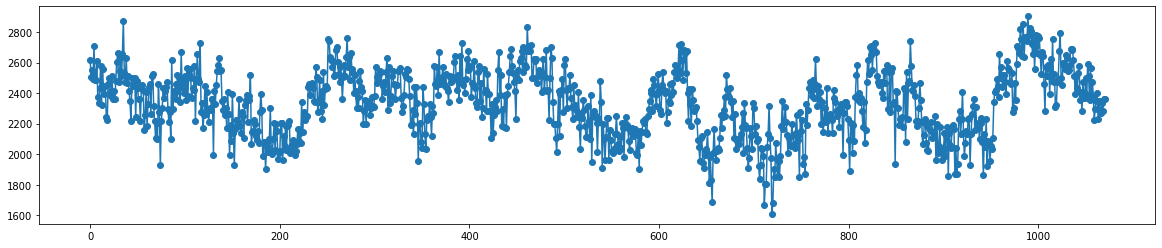

In [ ]:
import numpy as np
series = df_products.iloc[0:, :1].to_numpy()
fig = plt.figure(figsize=(20,4))
plt.plot(series, '-o')
plt.show()

In [ ]:
series = np.resize(series, len(series))

In [ ]:
series.shape, series1.shape

((1071, 1), (1071,))

In [ ]:
import numpy as np
n = 100
points = np.arange(len(series))
X = np.zeros(shape=(len(series)-n, n))
y = np.zeros(shape=(len(series)-n, 1))

y = series1[n:len(series)]
for j in range(len(series1)-n):
    X[j] = series1[j:j+n]

X_train = X[:-24]
y_train = y[:-24]

y = series[n:len(series)]
X_test = X[-24:]
y_test = y[-24:]

w = np.linalg.inv(X_train.T@X_train)@X_train.T@y_train

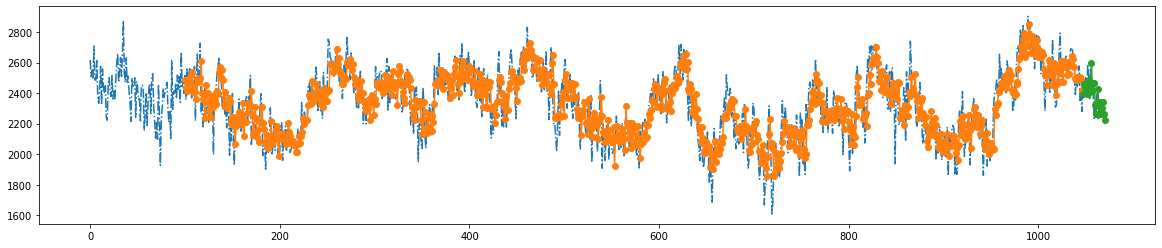

In [ ]:
fig = plt.figure(figsize=(20,4))
plt.plot(points, series, '-.')
plt.plot(points[n:len(series)-24], X_train@w, '-o')
plt.plot(points[-24:], X_test@w, '-o')
plt.show()

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
def code_mean(data, cat_feature, real_feature):
    """
    Возвращает словарь, где ключами являются уникальные категории признака cat_feature, 
    а значениями - средние по real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())
dataset = series1

In [ ]:
def prepareData(data, lag_start=5, lag_end=20, test_size=0.15):
    data = pd.DataFrame(delete_extr(data, 213.741588, 1.5).copy())
    data.columns = ["y"]
    # считаем индекс в датафрейме, после которого начинается тестовыый отрезок
    test_index = int(len(data)*(1-test_size))
    #test_index = 24
    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)
    date_from = data.index[0]
    date_to =  data.index[-1]

    date_range = pd.date_range(date_from, date_to, freq="D")
    data["month"] = date_range.month
    data["year"] = date_range.year
    data["weekday"] = date_range.weekday
    data['is_weekend'] = date_range.weekday.isin([5,6])*1
    # считаем средние только по тренировочной части, чтобы избежать лика
    data['weekday_average'] = list(map(code_mean(data[:test_index], 'weekday', "y").get, data.weekday))
    #data["year_average"] = list(map(code_mean(data[:test_index], 'year', "y").get, data.year))
    data["month_average"] = list(map(code_mean(data[:test_index], 'month', "y").get, data.month))
    #print(data['weekday_average'])
    # выкидываем закодированные средними признаки 
    data.drop(["year", "weekday", "month"], axis=1, inplace=True)
    
    data = data.dropna()
    data = data.reset_index(drop=True)
    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["y"], axis=1)
    y_train = data.loc[:test_index]["y"]
    X_test = data.loc[test_index:].drop(["y"], axis=1)
    y_test = data.loc[test_index:]["y"]
    #print(X_train.shape)
    return X_train, X_test, y_train, y_test

In [ ]:
X_train

,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,...,lag_41,lag_42,lag_43,lag_44,lag_45,lag_46,lag_47,is_weekend,weekday_average,month_average
47,2658.4,2658.4,2508.4,2633.0,2546.4,2470.2,2659.4,2600.1,2480.9,2361.3,...,2484.0,2486.0,2707.5,2492.4,2548.7,2507.9,2616.3,0,2310.130986,2397.469412
48,2529.0,2658.4,2658.4,2508.4,2633.0,2546.4,2470.2,2659.4,2600.1,2480.9,...,2611.9,2484.0,2486.0,2707.5,2492.4,2548.7,2507.9,0,2315.680282,2397.469412
49,2470.0,2529.0,2658.4,2658.4,2508.4,2633.0,2546.4,2470.2,2659.4,2600.1,...,2373.0,2611.9,2484.0,2486.0,2707.5,2492.4,2548.7,0,2336.387413,2397.469412
50,2630.4,2470.0,2529.0,2658.4,2658.4,2508.4,2633.0,2546.4,2470.2,2659.4,...,2333.2,2373.0,2611.9,2484.0,2486.0,2707.5,2492.4,1,2316.023776,2397.469412
51,2466.0,2630.4,2470.0,2529.0,2658.4,2658.4,2508.4,2633.0,2546.4,2470.2,...,2430.5,2333.2,2373.0,2611.9,2484.0,2486.0,2707.5,1,2327.978873,2397.469412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2662.2,2697.0,2710.8,2592.9,2354.6,2466.8,2305.2,2277.8,2534.5,2462.0,...,2036.6,2053.2,1957.4,2077.6,2083.8,1921.5,2228.2,0,2310.130986,2551.715854
993,2819.2,2662.2,2697.0,2710.8,2592.9,2354.6,2466.8,2305.2,2277.8,2534.5,...,2107.2,2036.6,2053.2,1957.4,2077.6,2083.8,1921.5,0,2315.680282,2551.715854
994,2756.5,2819.2,2662.2,2697.0,2710.8,2592.9,2354.6,2466.8,2305.2,2277.8,...,2340.9,2107.2,2036.6,2053.2,1957.4,2077.6,2083.8,0,2336.387413,2551.715854
995,2643.2,2756.5,2819.2,2662.2,2697.0,2710.8,2592.9,2354.6,2466.8,2305.2,...,2405.3,2340.9,2107.2,2036.6,2053.2,1957.4,2077.6,1,2316.023776,2551.715854


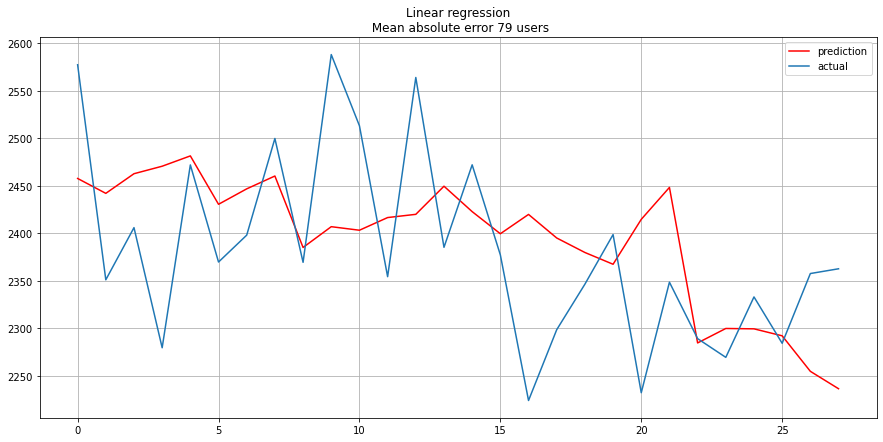

In [ ]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = prepareData(df_products.iloc[:,0], test_size=0.07, lag_start=12, lag_end=48)
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {} users".format(round(mean_absolute_error(prediction, y_test))))
plt.grid(True);

In [ ]:
import xgboost as xgb

def XGB_forecast(data, lag_start=5, lag_end=20, test_size=0.15, scale=1.96):

    # исходные данные
    X_train, X_test, y_train, y_test = prepareData(df_products.iloc[:,0], lag_start, lag_end, test_size)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test)

    # задаём параметры
    params = {
        'objective': 'reg:linear',
        'booster':'gblinear'
    }
    trees = 1000

    # прогоняем на кросс-валидации с метрикой rmse
    cv = xgb.cv(params, dtrain, metrics = ('rmse'), verbose_eval=False, nfold=10, show_stdv=False, num_boost_round=trees)

    # обучаем xgboost с оптимальным числом деревьев, подобранным на кросс-валидации
    bst = xgb.train(params, dtrain, num_boost_round=cv['test-rmse-mean'].argmin())

    # можно построить кривые валидации
    #cv.plot(y=['test-mae-mean', 'train-mae-mean'])

    # запоминаем ошибку на кросс-валидации
    deviation = cv.loc[cv['test-rmse-mean'].argmin()]["test-rmse-mean"]

    # посмотрим, как модель вела себя на тренировочном отрезке ряда
    prediction_train = bst.predict(dtrain)
    plt.figure(figsize=(15, 5))
    plt.plot(prediction_train)
    plt.plot(y_train)
    plt.axis('tight')
    plt.grid(True)

    # и на тестовом
    prediction_test = bst.predict(dtest)
    lower = prediction_test-scale*deviation
    upper = prediction_test+scale*deviation

    Anomalies = np.array([np.NaN]*len(y_test))
    Anomalies[y_test<lower] = y_test[y_test<lower]

    plt.figure(figsize=(15, 5))
    plt.plot(prediction_test, label="prediction")
    plt.plot(lower, "r--", label="upper bond / lower bond")
    plt.plot(upper, "r--")
    plt.plot(list(y_test), label="y_test")
    plt.plot(Anomalies, "ro", markersize=10)
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("XGBoost Mean absolute error {} users".format(round(mean_absolute_error(prediction_test, y_test))))
    plt.grid(True)
    plt.legend()

[22:02:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:02:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:02:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

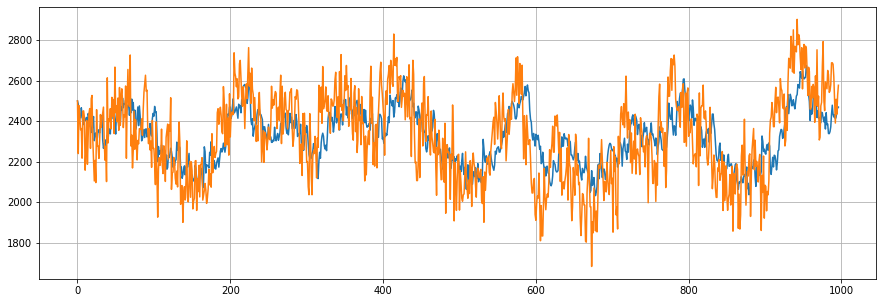

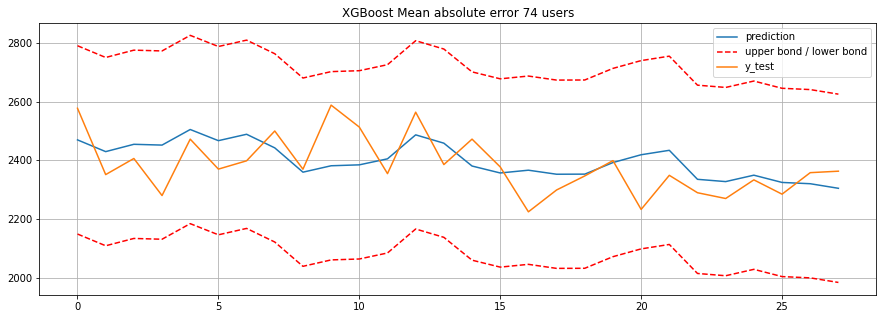

In [ ]:
XGB_forecast(dataset, test_size=0.07, lag_start=12, lag_end=48)

## 2.2. Валидация 
### 2.2.1. Метрики
<ol>
    <li>Какие метрики качества могут быть использованы в нашей задаче?</li>
    <li>В качестве метрики качества мы хотим использовать MSE; с какими проблемами мы можем столкнуться?</li>
</ol>

### 2.2.2. Кросс-валидация
Как провести кросс-валидацию?

### 2.2.3. Сравнение моделей
Предположим, мы построили несколько пайплайнов прогнозирования. Как выбрать лучший из них?
<ol>
    <li>В датасете 30 рядов, мы посчитали метрику для каждого из них, но нам надо понять, какой из пайплайнов работает лучше; как это сделать?</li>
    <li>Мы выбрали лучший из пайплайнов; можно ли еще улучшить его? Когда стоит остановиться?</li>
    <li>*Если в предыдущих частях были рассмотрены несколько пайплайнов, какой оказался лучшим? Как выглядит лучший прогноз? (Если выше был рассмотрен один пайплайн, пропустите этот пункт)</li>
</ol>

In [ ]:
# your code here

## 2.3. Использование доп данных
<ol>
    <li>Получилось ли использовать данные об акциях при построении прогнозов?</li>
    <li>Если да, помогают ли они предсказывать точнее?</li>
    <li>Как понять, какие из акций важны, а какие нет? Могут ли скоррелированные признаки помешать оценке важности признака? Что с этим делать?</li>
</ol>

In [ ]:
# your code here

## 2.4. Production 🚀
Мы построили восхитительный пайплайн прогнозирования! Как вывести его в продакшн?

***
# Свободная часть
Часть для самых смелых энтузиастов в мире временных рядов! 

Здесь предлагается попробовать сделать с датасетом что-то интересное на ваш вкус. Можно попробовать сделать что-то из предложенного:
- Покрутить датасет `dataset/influence.csv`: в нем дана матрица влияния каждой акции на каждый временной ряд продаж. Как ее можно использовать? Как это может помочь при прогнозировании? 
- Поглубже погрузиться в изучение "близости" временнях рядов и попробовать использовать эти знания для прогнозирования
- Подумать о том, как можно оценить влияние какого-то внешнего фактора-признака? Допустим, у нас есть такой же датасет с продажами и мы знаем, что определенная акция должна была повлиять на конкрентный ряд. Как оценить это влияние?
- Любая другая тема, которая кажется важной и интересной

In [ ]:
# your code here